<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/project/Metropolitan_Properties_Value_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. PLANTEAMIENTO DEL PROBLEMA**

Predecir el precio de venta (en UF o CLP) de una casa usada en la regi√≥n metropolitana de Chile en funci√≥n de sus caracter√≠sticas f√≠sicas y ubicaci√≥n.

# **2. OBJETIVO**

Construir un modelo predictivo que estime el valor de una vivienda (en UF o CLP) basado en atributos como el n√∫mero de habitaciones, n√∫mero de ba√±os, superficie total, superficie construida, n√∫mero de estacionamientos, y la comuna donde se encuentra la propiedad.

# **3. VARIABLES DEL DATASET**


1.   **Comuna:** Nombre de la comuna (municipio) dentro de la regi√≥n metropolitana de Chile donde se ubica la vivienda.
2.  **Enlace:**  Enlace al anuncio de la vivienda en el portal web.
3.  **Tipo_Vivienda:** Tipo de propiedad (por ejemplo, casa, departamento, etc.). Aunque en este conjunto de datos solo se incluyen casas.
4.  **N_Habitaciones:** N√∫mero de habitaciones disponibles en la vivienda.
5.  **N_Ba√±os:** N√∫mero de ba√±os que tiene la propiedad.
6.  **N_Estacionamientos :** N√∫mero de estacionamientos disponibles para la vivienda.
7.  **Total_Superficie_M2:** Superficie total del terreno de la propiedad, expresada en metros cuadrados.
8.  **Superficie_Construida_M2:** Superficie total del terreno de la propiedad, expresada en metros cuadrados.
9.  **Valor_UF:** Valor de la vivienda expresado en **UF** (Unidad de Fomento), una unidad monetaria utilizada en Chile que se ajusta por inflaci√≥n.
10.  **Valor_CLP:** Valor de la vivienda expresado en **CLP** (pesos chilenos).
11.  **Direcci√≥n:** Direcci√≥n de la propiedad que incluye calle ya veces detalles adicionales.
12.  **Qui√©n_vende:** Nombre de la persona (particular) o empresa que est√° vendiendo la propiedad.
13.  **Corredor:** Nombre de la inmobiliaria o corredor de propiedades que est√° a cargo de la venta.


# **4. IMPORTAR LIBRERIAS**

In [1]:
# Bibliotecas para manipulaci√≥n y an√°lisis de datos
import pandas as pd  # Manipulaci√≥n de datos y estructuras de datos
import numpy as np  # Operaciones num√©ricas y manipulaci√≥n de matrices

# Visualizaci√≥n de datos
import matplotlib.pyplot as plt  # Visualizaci√≥n de datos en gr√°ficos
import seaborn as sns  # Visualizaci√≥n estad√≠stica basada en matplotlib

# Modelos y t√©cnicas de Machine Learning
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score, cross_val_predict, train_test_split  # M√©todos de validaci√≥n y b√∫squeda de hiperpar√°metros
from sklearn.neighbors import KNeighborsClassifier  # Clasificador K-vecinos m√°s cercanos
from sklearn.ensemble import RandomForestClassifier  # Clasificador de bosque aleatorio
from sklearn.svm import SVC  # Clasificador de m√°quinas de soporte vectorial
from sklearn.linear_model import Lasso, Ridge  # Regresores Lasso y Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder  # Normalizaci√≥n de datos y codificaci√≥n de etiquetas
from sklearn.feature_selection import SelectKBest, f_classif, RFECV  # M√©todos de selecci√≥n de caracter√≠sticas
from sklearn.pipeline import Pipeline  # Creaci√≥n de flujos de trabajo para el procesamiento y modelado
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, mean_squared_error,
                             r2_score, mean_absolute_error, mean_absolute_percentage_error)  # M√©tricas de evaluaci√≥n del modelo
from sklearn.compose import ColumnTransformer  # Transformaciones para diferentes columnas

# Modelos avanzados y optimizaci√≥n
from xgboost import XGBClassifier  # Clasificador XGBoost para optimizaci√≥n y rendimiento
import tensorflow as tf  # Framework para redes neuronales y Deep Learning
from tensorflow.keras.models import Sequential  # Modelos secuenciales en Keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  # Capas para redes neuronales
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Preprocesamiento de secuencias

# Herramientas adicionales
import statsmodels.api as sm  # Modelos estad√≠sticos
import warnings  # Manejo de advertencias


In [2]:
# Desactivar las alertas

warnings.filterwarnings('ignore')

# **5. IMPORTAR DATOS**

In [3]:
# Importar el datasets
df_viviendas = pd.read_csv('/content/drive/MyDrive/data/Casas usadas - RM Mayo 2020.csv', encoding='latin-1',  delimiter=';')

In [4]:
# Establecer la opci√≥n para mostrar todas las columnas en un DataFrame
pd.set_option('display.max_columns', None)

In [5]:
# Visualizar las primeras filas del DataFrame df_mobile_market
df_viviendas.head()


Comuna                                               Link  \
0  Calera de Tango  https://chilepropiedades.cl/ver-publicacion/ve...   
1  Calera de Tango  https://chilepropiedades.cl/ver-publicacion/ve...   
2  Calera de Tango  https://chilepropiedades.cl/ver-publicacion/ve...   
3  Calera de Tango  https://chilepropiedades.cl/ver-publicacion/ve...   
4  Calera de Tango  https://chilepropiedades.cl/ver-publicacion/ve...   

  Tipo_Vivienda  N_Habitaciones  N_Ba√±os N_Estacionamientos  \
0          Casa             5.0      6.0                  3   
1          Casa             6.0      6.0                  6   
2          Casa             3.0      3.0                 No   
3          Casa             8.0      6.0                 No   
4          Casa             3.0      2.0                  3   

  Total_Superficie_M2 Superficie_Construida_M2   Valor_UF   Valor_CLP  \
0                5000                      440        12.2  351360000   
1                5000                      430        13.0  374400000   
2                2027                      140        10.3  296640000   
3                5000                      480        21.5  619200000   
4                5000                      196         9.1  262080000   

                                           Direcci√≥n  \
0                           Calera de Tango, Queilen   
1                           Calera de Tango, Queilen   
2  Calera de Tango, Avenida calera de tango   con...   
3  Calera de Tango, Paradero 14 1/2/5 kilometros ...   
4  Calera de Tango, Condominio El Tr√©bol de Caler...   

                                  Qui√©n_Vende  \
0                         Gabriela Mellado V.   
1                         Gabriela Mellado V.   
2  Alonso Baeza Rivera y C√≠a. Ltda. (Kennedy)   
3                     RED Gesti√≥n Propiedades   
4                         Gabriela Mellado V.   

                                     Corredor  
0                          Zenpro Propiedades  
1                          Zenpro Propiedades  
2  Alonso Baeza Rivera y C√≠a. Ltda. (Kennedy)  
3                     Red Gesti√≥n Propiedades  
4                          Zenpro Propiedades

# **6. AN√ÅLISIS DE DATOS EXPLORATORIO (EDA)**

In [6]:
# Visualizar la informaci√≥n del DataFrame df_viviendas
df_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comuna                    1139 non-null   object 
 1   Link                      1139 non-null   object 
 2   Tipo_Vivienda             1139 non-null   object 
 3   N_Habitaciones            1131 non-null   float64
 4   N_Ba√±os                   1118 non-null   float64
 5   N_Estacionamientos        1067 non-null   object 
 6   Total_Superficie_M2       1102 non-null   object 
 7   Superficie_Construida_M2  1103 non-null   object 
 8    Valor_UF                 1139 non-null   float64
 9   Valor_CLP                 1139 non-null   int64  
 10  Direcci√≥n                 1102 non-null   object 
 11  Qui√©n_Vende               1139 non-null   object 
 12  Corredor                  1139 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 115.8+ KB


In [7]:
# Convertir columnas a tipos num√©ricos
df_viviendas['N_Estacionamientos'] = pd.to_numeric(df_viviendas['N_Estacionamientos'], errors='coerce')
df_viviendas['Total_Superficie_M2'] = pd.to_numeric(df_viviendas['Total_Superficie_M2'], errors='coerce')
df_viviendas['Superficie_Construida_M2'] = pd.to_numeric(df_viviendas['Superficie_Construida_M2'], errors='coerce')


In [8]:
# Eliminar filas con valores nulos
df_viviendas_clean = df_viviendas.dropna()

In [9]:
# Crear un DataFrame para visualizar la cantidad y porcentaje de datos en blanco
datos_blanco = pd.DataFrame({
    'Registros en Blanco': df_viviendas_clean.isna().sum(),
    '% Registros en Blanco': df_viviendas_clean.isna().sum() / len(df_viviendas_clean) * 100  # Multiplicar por 100 para obtener el porcentaje
})

# Mostrar los datos en blanco
datos_blanco


Registros en Blanco  % Registros en Blanco
Comuna                                      0                    0.0
Link                                        0                    0.0
Tipo_Vivienda                               0                    0.0
N_Habitaciones                              0                    0.0
N_Ba√±os                                     0                    0.0
N_Estacionamientos                          0                    0.0
Total_Superficie_M2                         0                    0.0
Superficie_Construida_M2                    0                    0.0
 Valor_UF                                   0                    0.0
Valor_CLP                                   0                    0.0
Direcci√≥n                                   0                    0.0
Qui√©n_Vende                                 0                    0.0
Corredor                                    0                    0.0

In [10]:
# Eliminar espacios
df_viviendas_clean.columns = df_viviendas_clean.columns.str.strip()

In [11]:
#Visualizar los valores distintos de las variables categoricas del DataFrame df_mobile_market

# Seleccionar las variables categ√≥ricas del DataFrame df_viviendas
var_cat_viviendas = df_viviendas_clean[['Tipo_Vivienda', 'Comuna','Direcci√≥n','Corredor' ]]

# Calcular la frecuencia de los valores √∫nicos en cada columna
unique_counts_viviendas = var_cat_viviendas.nunique()
unique_values_viviendas = var_cat_viviendas.apply(lambda x: x.unique())

# Crear un DataFrame para visualizar la frecuencia y los valores √∫nicos
result_viviendas = pd.DataFrame({
    'Frequency': unique_counts_viviendas,
    'Unique Values': unique_values_viviendas
})

# Mostrar los datos de result_viviendas
result_viviendas

Frequency                                      Unique Values
Tipo_Vivienda          1                                             [Casa]
Comuna                40  [Calera de Tango, Cerrillos, Cerro Navia, Coli...
Direcci√≥n            371  [Calera de Tango, Queilen, Calera de Tango, Co...
Corredor              87  [Zenpro Propiedades, Vende Due√±o/a, Johanna Ro...

In [12]:
# Visualizar la descripci√≥n estad√≠stica de las variables num√©ricas en df_viviendas

# Eliminar las columnas categ√≥ricas para quedarte solo con las variables num√©ricas
var_num_viviendas = df_viviendas_clean.drop(var_cat_viviendas.columns, axis=1)

# Calcular la descripci√≥n estad√≠stica de las variables num√©ricas
estadisticas_viviendas = var_num_viviendas.describe().T.round(1)

# Mostrar el resultado
estadisticas_viviendas

count         mean          std         min  \
N_Habitaciones            389.0          3.9          1.3         1.0   
N_Ba√±os                   389.0          2.5          1.3         1.0   
N_Estacionamientos        389.0          2.6          1.7         1.0   
Total_Superficie_M2       389.0        690.6       1892.6         0.0   
Superficie_Construida_M2  389.0        146.9         95.4         0.0   
Valor_UF                  389.0          6.9          6.0         1.2   
Valor_CLP                 389.0  199969673.6  173275689.0  35000000.0   

                                 25%          50%          75%           max  
N_Habitaciones                   3.0          4.0          4.0  1.400000e+01  
N_Ba√±os                          2.0          2.0          3.0  1.000000e+01  
N_Estacionamientos               2.0          2.0          3.0  8.000000e+00  
Total_Superficie_M2            170.0        250.0        430.0  3.000000e+04  
Superficie_Construida_M2        90.0        120.0        165.0  7.000000e+02  
Valor_UF                         3.1          5.2          8.0  3.690000e+01  
Valor_CLP                 90000000.0  150000000.0  230000000.0  1.062720e+09

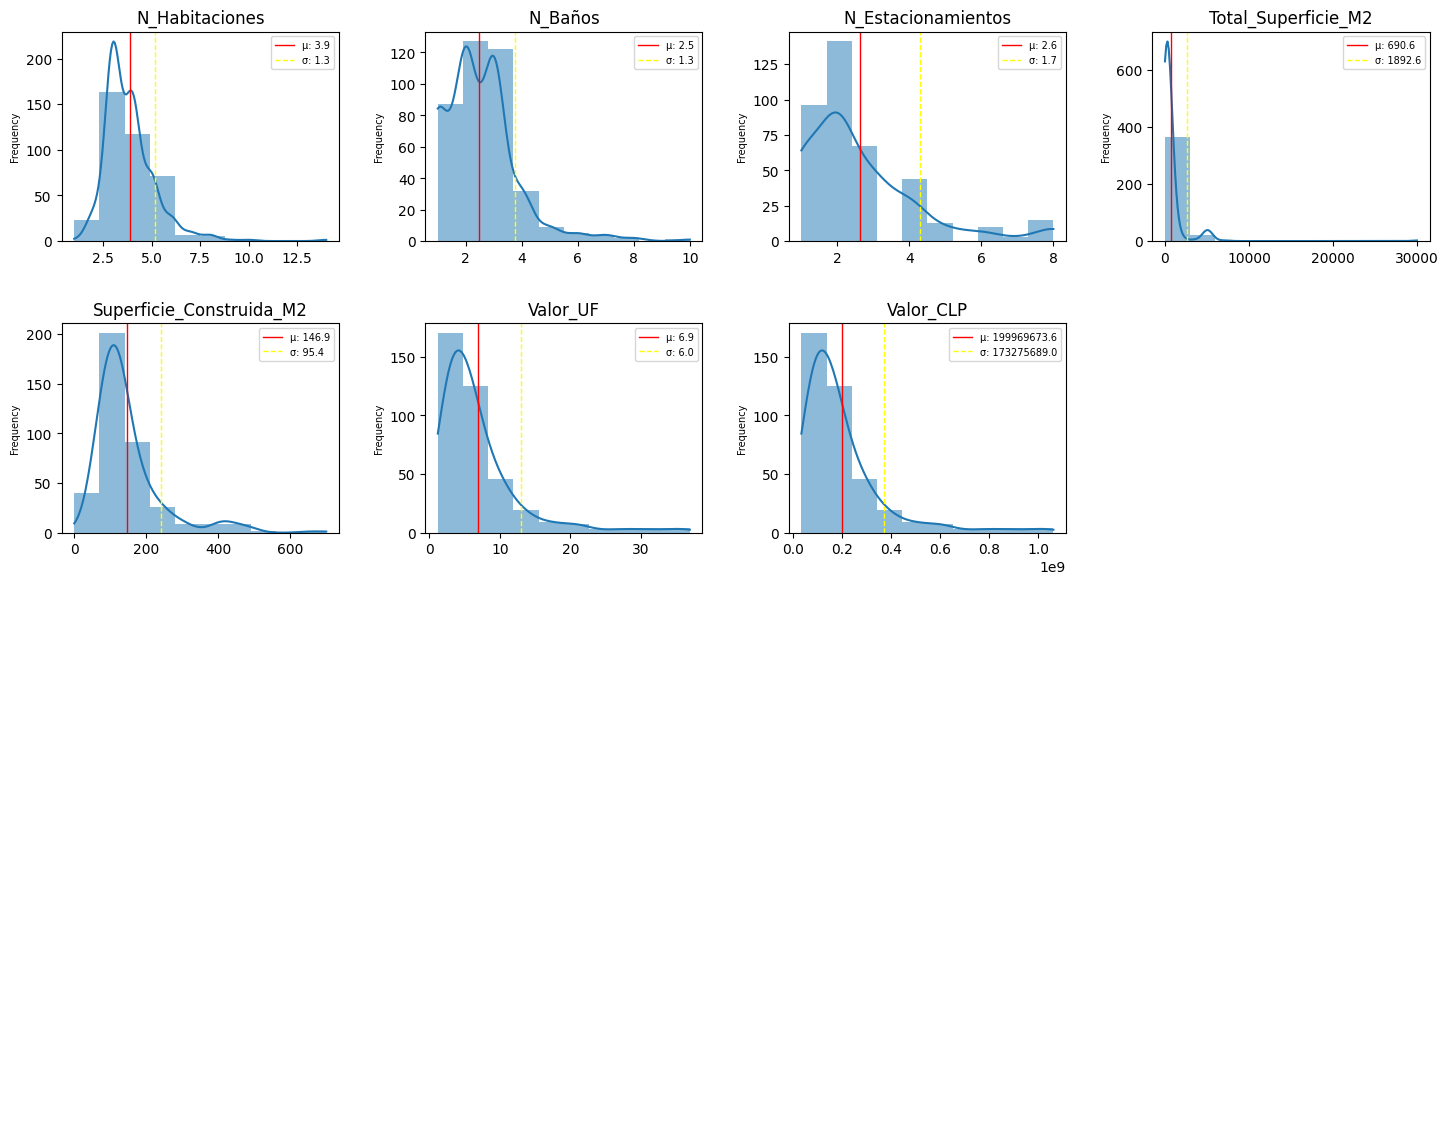

In [13]:
# Seleccionar las columnas num√©ricas del DataFrame
var_num_viviendas = df_viviendas_clean[['N_Habitaciones', 'N_Ba√±os', 'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2', 'Valor_UF', 'Valor_CLP']]

# Obtener la lista de columnas num√©ricas
columns = var_num_viviendas.columns.tolist()

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))

# Recorrer las variables y graficar
for i, variable in enumerate(columns):
    row = i // 4
    col = i % 4

    # Crear el histograma con seaborn
    sns.histplot(var_num_viviendas[variable], bins=10, edgecolor=None, kde=True, ax=axes[row, col])

    # Calcular la media y la desviaci√≥n est√°ndar
    mean_value = var_num_viviendas[variable].mean()
    std_dev = var_num_viviendas[variable].std()

    # A√±adir l√≠neas de media y desviaci√≥n est√°ndar
    axes[row, col].axvline(mean_value, color='red', linewidth=1, label=f'¬µ: {mean_value:.1f}')
    axes[row, col].axvline(mean_value + std_dev, color='yellow', linestyle='--', linewidth=1, label=f'œÉ: {std_dev:.1f}')

    # Configurar etiquetas y t√≠tulo
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Frequency', fontsize=7)
    axes[row, col].set_title(variable)
    axes[row, col].legend(loc='upper right', fontsize=7)

# Ajustar el layout
plt.tight_layout(pad=2.5)

# Apagar los ejes no utilizados (en caso de que haya menos de 16 variables)
for j in range(i + 1, 16):
    axes[j // 4, j % 4].axis('off')

plt.show()


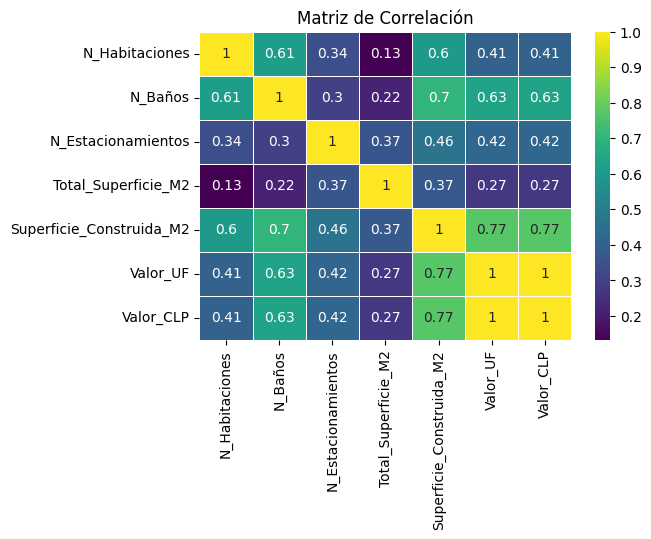

In [14]:
# Convertir columnas a tipo num√©rico
df_viviendas_clean.loc[:, 'N_Habitaciones'] = pd.to_numeric(df_viviendas_clean['N_Habitaciones'], errors='coerce')
df_viviendas_clean.loc[:, 'N_Ba√±os'] = pd.to_numeric(df_viviendas_clean['N_Ba√±os'], errors='coerce')
df_viviendas_clean.loc[:, 'N_Estacionamientos'] = pd.to_numeric(df_viviendas_clean['N_Estacionamientos'], errors='coerce')
df_viviendas_clean.loc[:, 'Total_Superficie_M2'] = pd.to_numeric(df_viviendas_clean['Total_Superficie_M2'], errors='coerce')
df_viviendas_clean.loc[:, 'Superficie_Construida_M2'] = pd.to_numeric(df_viviendas_clean['Superficie_Construida_M2'], errors='coerce')
df_viviendas_clean.loc[:, 'Valor_UF'] = pd.to_numeric(df_viviendas_clean['Valor_UF'], errors='coerce')
df_viviendas_clean.loc[:, 'Valor_CLP'] = pd.to_numeric(df_viviendas_clean['Valor_CLP'], errors='coerce')

# Definir var_num_viviendas despu√©s de la conversi√≥n
var_num_viviendas = df_viviendas_clean[['N_Habitaciones', 'N_Ba√±os', 'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2', 'Valor_UF', 'Valor_CLP']]

# Calcular la matriz de correlaci√≥n
corr = var_num_viviendas.corr()

# Crear el mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=0.5)
plt.title("Matriz de Correlaci√≥n")
plt.show()

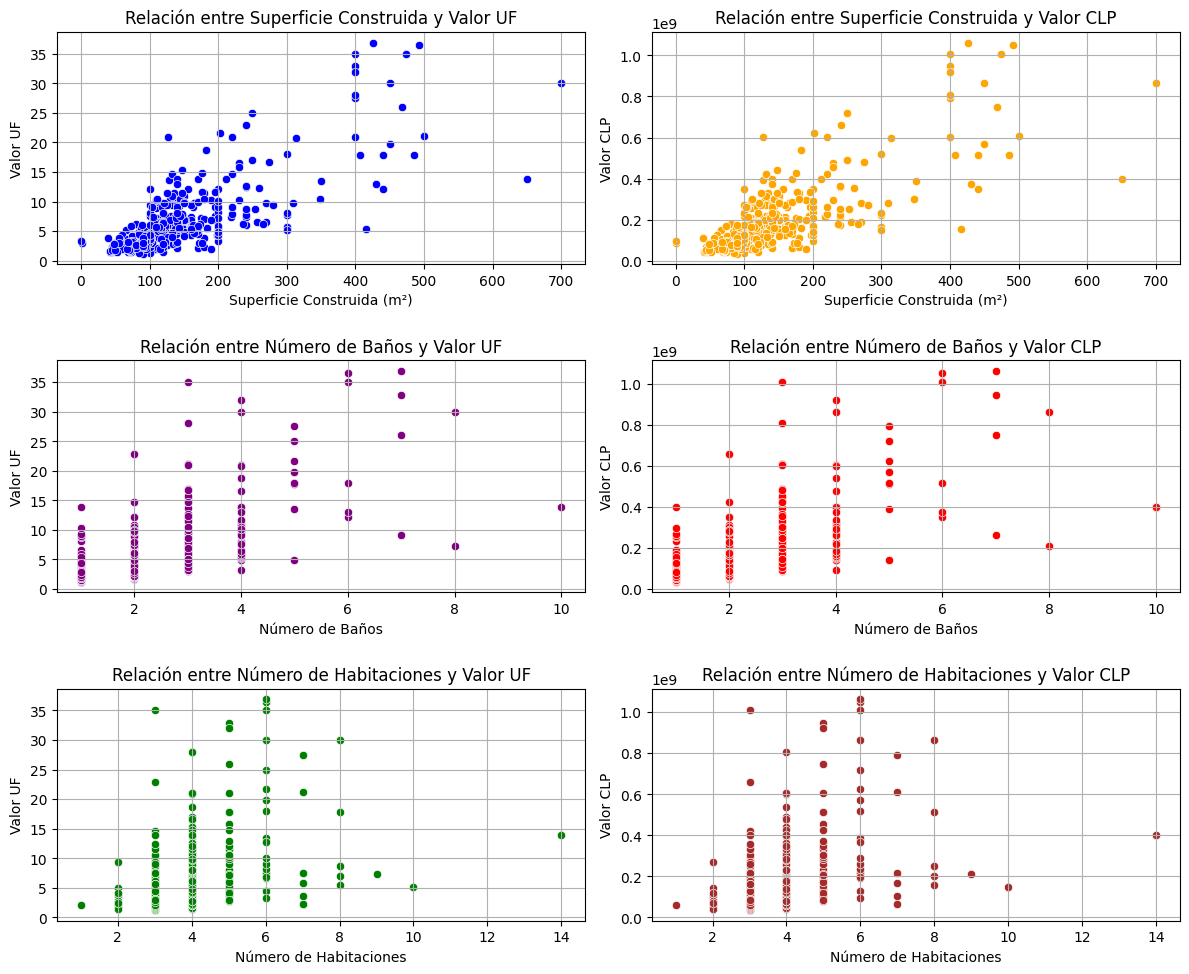

In [15]:
# Visualizar la distribucion de los datos de las variables con mayor correlaci√≥n

# Crear gr√°ficos de dispersi√≥n para las variables
plt.figure(figsize=(12, 10))
# Gr√°fico 1: Relaci√≥n entre superficie construida y valor UF
plt.subplot(3, 2, 1)
sns.scatterplot(x='Superficie_Construida_M2', y='Valor_UF', data=df_viviendas_clean, color='blue')
plt.title('Relaci√≥n entre Superficie Construida y Valor UF')
plt.xlabel('Superficie Construida (m¬≤)')
plt.ylabel('Valor UF')
plt.grid()

# Gr√°fico 2: Relaci√≥n entre superficie construida y valor CLP
plt.subplot(3, 2, 2)
sns.scatterplot(x='Superficie_Construida_M2', y='Valor_CLP', data=df_viviendas_clean, color='orange')
plt.title('Relaci√≥n entre Superficie Construida y Valor CLP')
plt.xlabel('Superficie Construida (m¬≤)')
plt.ylabel('Valor CLP')
plt.grid()

# Gr√°fico 3: Relaci√≥n entre n√∫mero de ba√±os y valor UF
plt.subplot(3, 2, 3)
sns.scatterplot(x='N_Ba√±os', y='Valor_UF', data=df_viviendas_clean, color='purple')
plt.title('Relaci√≥n entre N√∫mero de Ba√±os y Valor UF')
plt.xlabel('N√∫mero de Ba√±os')
plt.ylabel('Valor UF')
plt.grid()

# Gr√°fico 4: Relaci√≥n entre n√∫mero de ba√±os y valor CLP
plt.subplot(3, 2, 4)
sns.scatterplot(x='N_Ba√±os', y='Valor_CLP', data=df_viviendas_clean, color='red')
plt.title('Relaci√≥n entre N√∫mero de Ba√±os y Valor CLP')
plt.xlabel('N√∫mero de Ba√±os')
plt.ylabel('Valor CLP')
plt.grid()

# Gr√°fico 5: Relaci√≥n entre n√∫mero de habitaciones y valor UF
plt.subplot(3, 2, 5)
sns.scatterplot(x='N_Habitaciones', y='Valor_UF', data=df_viviendas_clean, color='green')
plt.title('Relaci√≥n entre N√∫mero de Habitaciones y Valor UF')
plt.xlabel('N√∫mero de Habitaciones')
plt.ylabel('Valor UF')
plt.grid()

# Gr√°fico 6: Relaci√≥n entre n√∫mero de habitaciones y valor CLP
plt.subplot(3, 2, 6)
sns.scatterplot(x='N_Habitaciones', y='Valor_CLP', data=df_viviendas_clean, color='brown')
plt.title('Relaci√≥n entre N√∫mero de Habitaciones y Valor CLP')
plt.xlabel('N√∫mero de Habitaciones')
plt.ylabel('Valor CLP')
plt.grid()


plt.tight_layout()
plt.show()

**Interpretaci√≥n**


*   Al analizar la correlaci√≥n entre las variables en nuestro conjunto de datos, observamos que **Superficie_Construida_M2** y **Valor_UF** tienen una correlaci√≥n positiva significativa de **0.77.** Esto sugiere que a medida que aumenta la superficie construida, tambi√©n tiende a aumentar el valor en UF de las propiedades. Este hallazgo es relevante, ya que sugiere que las propiedades m√°s grandes en t√©rminos de superficie construida tienen un mayor valor, lo que se alinea con las expectativas del mercado.
*   La relaci√≥n entre **Valor_UF** y **Valor_CLP** tambi√©n es notable, con una correlaci√≥n de **1.0**, lo que indica una relaci√≥n perfecta entre ambos. Esto sugiere que los cambios en el valor de la unidad de fomento (UF) impactan directamente en el valor en pesos chilenos (CLP), lo que es de esperarse en el contexto econ√≥mico chileno.
*   Por otro lado, **N_Ba√±os** y **N_Habitaciones** presentan una correlaci√≥n de **0.61,** indicando que a medida que aumenta el n√∫mero de habitaciones, tambi√©n tiende a aumentar el n√∫mero de ba√±os. Este es un patr√≥n l√≥gico en el dise√±o de viviendas, donde propiedades con m√°s habitaciones suelen tener m√°s ba√±os.
*   El an√°lisis revela que **N_Estacionamientos** y **Superficie_Total_m2** tienen una correlaci√≥n de **0.37,** sugiriendo que hay una relaci√≥n moderada entre el n√∫mero de estacionamientos y la superficie total. Esto podr√≠a indicar que las propiedades con m√°s espacio tienden a ofrecer m√°s estacionamientos, aunque la relaci√≥n no es tan fuerte como en otros casos.
*  Adem√°s, **N_Habitaciones** y **Superficie_Construida_M2** tienen una correlaci√≥n de **0.6,** lo que implica que a medida que aumenta el n√∫mero de habitaciones, tambi√©n se tiende a incrementar la superficie construida. Esto refuerza la idea de que propiedades con m√°s habitaciones suelen ser m√°s amplias.


# **7. Definir Datos de Entrenamiento y Prueba**

In [16]:
# Definir las variables independientes (X) y la variable dependiente (y)

X = df_viviendas_clean[['N_Habitaciones', 'N_Ba√±os', 'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2']]
y = df_viviendas_clean['Valor_UF']  # o 'Valor_CLP'


# Crear un nuevo DataFrame para mostrar X y y juntos
df_variables = pd.DataFrame(X)
df_variables['Valor_UF'] = y  # o 'Valor_CLP'

df_variables

N_Habitaciones  N_Ba√±os  N_Estacionamientos  Total_Superficie_M2  \
0                5.0      6.0                 3.0               5000.0   
1                6.0      6.0                 6.0               5000.0   
4                3.0      2.0                 3.0               5000.0   
6                3.0      2.0                 4.0               2600.0   
11               6.0      5.0                 2.0               5000.0   
...              ...      ...                 ...                  ...   
1086             4.0      2.0                 2.0                350.0   
1088             5.0      4.0                 3.0                350.0   
1090             5.0      5.0                 4.0               5000.0   
1116             5.0      3.0                 2.0                190.0   
1124             4.0      3.0                 2.0                150.0   

      Superficie_Construida_M2  Valor_UF  
0                        440.0    12.200  
1                        430.0    13.000  
4                        196.0     9.100  
6                        140.0     9.850  
11                       250.0    25.000  
...                        ...       ...  
1086                      89.0     6.076  
1088                     140.0    13.000  
1090                     486.0    17.900  
1116                     111.0    10.500  
1124                     127.0    21.000  

[389 rows x 6 columns]

In [17]:
# Agregar una constante a las variables independientes para el modelo
X = sm.add_constant(X)  # Esto es necesario para la regresi√≥n lineal m√∫ltiple en statsmodels

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **8. Modelo de regresi√≥n lineal m√∫ltiple utilizando OLS (m√≠nimos cuadrados ordinarios)**

Un modelo de **regresi√≥n lineal m√∫ltiple** es una herramienta estad√≠stica usada para analizar la relaci√≥n entre una variable objetivo continua (llamada "destino") y m√∫ltiples variables predictoras. Estas variables predictoras pueden ser de diferentes tipos: continuas, categ√≥ricas o derivadas, lo que permite que el modelo maneje relaciones no lineales tambi√©n.

El modelo se considera lineal porque cada predictor se multiplica por un coeficiente estimado y se suma al resto de los t√©rminos, incluyendo una constante (o intercepci√≥n). La regresi√≥n lineal se utiliza para descubrir patrones en datos que incluyen al menos dos variables continuas (una como destino y otra como predictor).

Adem√°s, se pueden usar predictores categ√≥ricos junto con variables continuas para ajustar el modelo. IBM Cognos Analytics, por ejemplo, aplica pruebas estad√≠sticas, como la prueba F, para evaluar la significancia de estos modelos.

Ref. https://www.ibm.com/docs/es/cognos-analytics/11.1.0?topic=tests-multiple-linear-regression


Es el modelo m√°s apropiado para mi proyecto. Ya que permite predecir una variable dependiente (precio en UF o CLP) utilizando m√∫ltiples variables independientes (n√∫mero de habitaciones, n√∫mero de ba√±os, superficie total, superficie construida).


In [18]:
# A√±adir constante a las variables independientes (para obtener el intercepto)
# Esto representa el efecto que tiene cada variable independiente sobre la variable dependiente
# En otras palabras, cada coeficiente te dice en qu√© medida cambia la variable dependiente.
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Crear el modelo de regresi√≥n lineal m√∫ltiple
model = sm.OLS(y_train, X_train).fit()  # Usamos OLS para regresi√≥n lineal m√∫ltiple

In [19]:
# Coeficientes del modelo
coeficientes = model.params  # Aqu√≠ obtienes los coeficientes (incluye el intercepto)

# El primer valor de coeficientes es el intercepto (constante)
intercepto = coeficientes[0]  # Esto asume que has a√±adido una constante antes en X_train

# Los dem√°s coeficientes corresponden a las variables independientes
pendientes = coeficientes[1:]

# Imprimir los resultados
print("\nCoeficientes del modelo (pendientes):")
for var, coef in zip(X_train.columns[1:], pendientes):  # Evitar la columna constante
    print(f'{var}: {coef:.4f}')

print(f"Intercepto del modelo: {intercepto:.4f}")


Coeficientes del modelo (pendientes):
N_Habitaciones: -0.9096
N_Ba√±os: 1.1886
N_Estacionamientos: 0.4026
Total_Superficie_M2: 0.0001
Superficie_Construida_M2: 0.0436
Intercepto del modelo: 0.0953


In [20]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

**MSE (Mean Squared Error - Error Cuadr√°tico Medio):** Mide el promedio de los cuadrados de los errores, es decir, la diferencia entre los valores predichos y los valores reales.

Donde:

*  *y*i es el valor real
*  *y*^i es el valor predicho
*  n es el n√∫mero total de observaciones.


F√≥rmula:

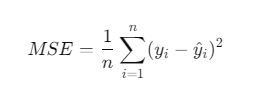

In [21]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)

**MAE (Mean Absolute Error - Error Absoluto Medio):** Mide el promedio de las diferencias absolutas entre los valores reales y los valores predichos.

F√≥rmula:

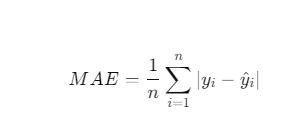

In [22]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

**R¬≤ (Coeficiente de Determinaci√≥n):** Mide la proporci√≥n de la varianza total de la variable dependiente que es explicada por las variables independientes. El valor de **R¬≤** var√≠a entre 0 y 1, siendo 1 una predicci√≥n perfecta.

Donde ùë¶Àâes el valor promedio de los valores reales.

F√≥rmula:

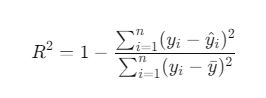

In [23]:
# Calcular R^2
r2 = r2_score(y_test, y_pred)

In [24]:

# Imprimir los resultados
print(f'Error Cuadr√°tico Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinaci√≥n (R^2): {r2:.2f}')

Error Cuadr√°tico Medio (MSE): 15.21
Error Absoluto Medio (MAE): 2.62
Coeficiente de Determinaci√≥n (R^2): 0.58


**El MAPE (Mean Absolute Percentage Error) *** es una m√©trica que se utiliza para medir la precisi√≥n de un modelo de predicci√≥n. Se calcula como el promedio del porcentaje absoluto de error entre las predicciones y los valores reales. El MAPE se expresa en porcentaje y es √∫til para entender cu√°n precisas son las predicciones en relaci√≥n con los valores reales.

Donde:

*  *y*i son los valores reales
*  *y*^i son los valores predichos
*  n es el n√∫mero total de observaciones.



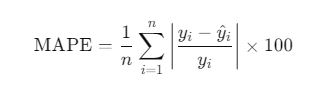

In [25]:
# Calcular el MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calcular el MAPE para las predicciones
mape = calculate_mape(y_test, y_pred)

# Imprimir el resultado
print(f'MAPE: {mape:.2f}%')

MAPE: 46.40%


In [26]:
# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse:.2f}')

RMSE: 3.90


In [27]:
# Definir los coeficientes y m√©tricas en un diccionario
resultados = {
    "Descripci√≥n": [
        "Intercepto del Modelo",
        "Error Cuadr√°tico Medio (MSE)",
        "Error Absoluto Medio (MAE)",
        "Coeficiente de Determinaci√≥n (R^2)",
        "MAPE",
        "Ra√≠z del Error Cuadr√°tico Medio (RMSE)"
    ],
    "Valor": [
        intercepto, mse, mae, r2, mape, rmse
    ]
}

# Agregar los coeficientes al diccionario
for var, coef in zip(X_train.columns[1:], pendientes):
    resultados["Descripci√≥n"].append(f"Coeficiente de {var}")
    resultados["Valor"].append(coef)

# Crear el DataFrame
df_resultados = pd.DataFrame(resultados)

# Aplicar estilo
styled_df = df_resultados.style.background_gradient(cmap="coolwarm").format({"Valor": "{:.4f}"})

# Mostrar tabla estilizada
styled_df

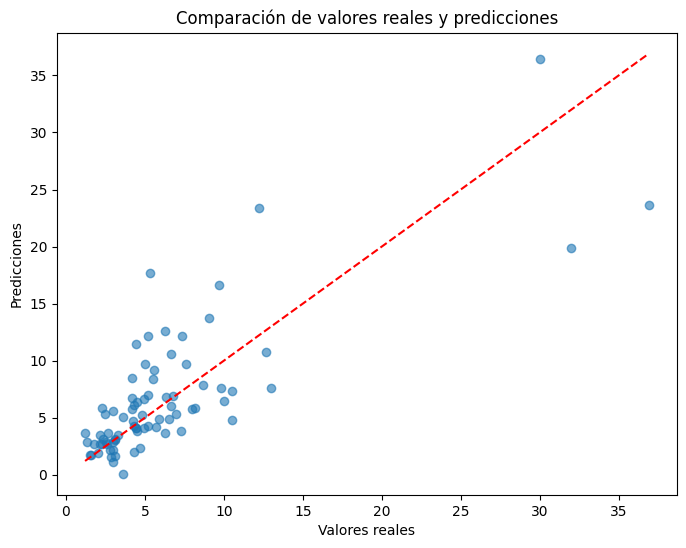

In [28]:
# Graficar el Comparaci√≥n de valores reales y predicciones

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # L√≠nea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparaci√≥n de valores reales y predicciones')
plt.show()

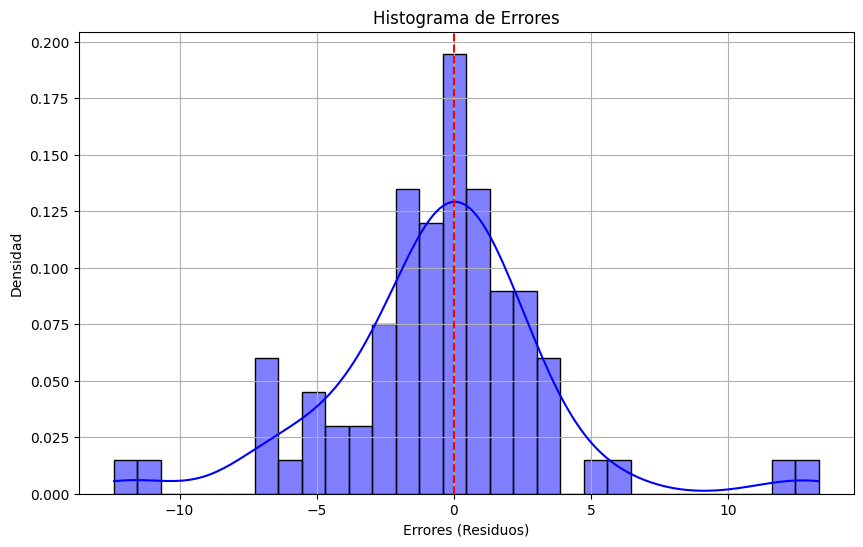

In [29]:
# Calcular los errores (residuos)
errors = y_test - y_pred

# Graficar el histograma de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='blue', stat='density')
plt.title('Histograma de Errores')
plt.xlabel('Errores (Residuos)')
plt.ylabel('Densidad')
plt.axvline(0, color='red', linestyle='--')  # L√≠nea vertical en 0
plt.grid()
plt.show()

# **9. MODELO DE LASSO REGRESSION**



Lasso, o Least Absolute Shrinkage and Selection Operator, es un modelo lineal que penaliza el vector de coeficientes a√±adiendo su norma L1 a la funci√≥n de coste. Esto genera coeficientes dispersos, donde muchos de ellos son cero, lo que significa que el modelo ignora ciertas caracter√≠sticas predictivas. Esta propiedad permite realizar una selecci√≥n autom√°tica de caracter√≠sticas, resultando en un modelo m√°s simple y f√°cil de interpretar, al resaltar las caracter√≠sticas m√°s relevantes.

Si las caracter√≠sticas predictivas est√°n correlacionadas, Lasso tiende a seleccionar una de ellas al azar. Por lo tanto, aunque Ridge es una buena opci√≥n general, Lasso puede ofrecer mejores resultados si se sospecha que los datos dependen de un subconjunto espec√≠fico de caracter√≠sticas.

ref.https://interactivechaos.com/es/manual/tutorial-de-machine-learning/regresion-lasso

In [30]:
# Crear el modelo Lasso con un valor de alpha
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [31]:
# Hacer predicciones
lasso_predictions = lasso_model.predict(X_test)

In [32]:
# Calcular m√©tricas de evaluaci√≥n
mse = mean_squared_error(y_test, lasso_predictions)
mae = mean_absolute_error(y_test, lasso_predictions)
r2 = r2_score(y_test, lasso_predictions)
mape = mean_absolute_percentage_error(y_test, lasso_predictions) * 100  # en porcentaje
rmse = np.sqrt(mse)

In [33]:
# Crear un DataFrame con todas las m√©tricas
resultados = pd.DataFrame({
    "M√©trica": ["MSE", "MAE", "RMSE", "R^2", "MAPE"],
    "Valor": [mse, mae, rmse, r2, mape]
})

# Mostrar la tabla de resultados con estilo de color
print("Tabla de m√©tricas del modelo Lasso:")
styled_resultados = resultados.style.background_gradient(cmap="coolwarm").format({"Valor": "{:.4f}"})
display(styled_resultados)

Tabla de m√©tricas del modelo Lasso:


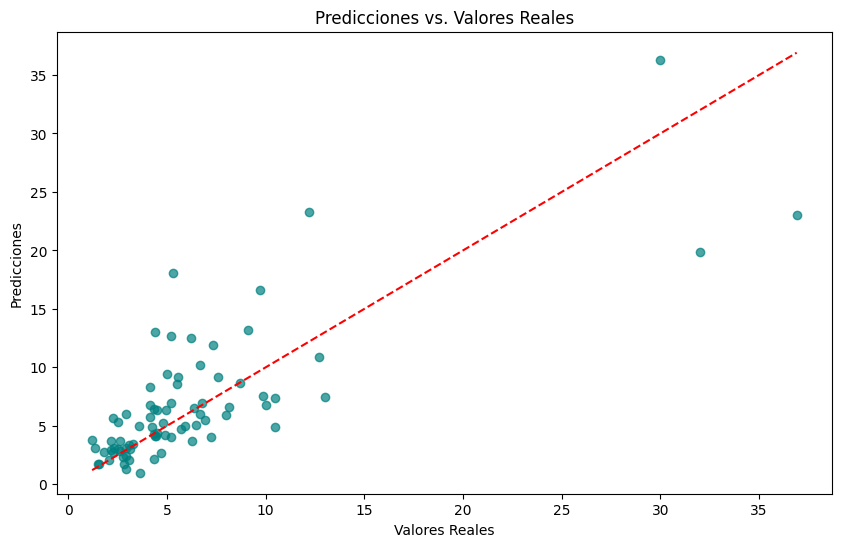

In [34]:
# 1. Gr√°fico de dispersi√≥n de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_predictions, alpha=0.7, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales")
plt.show()


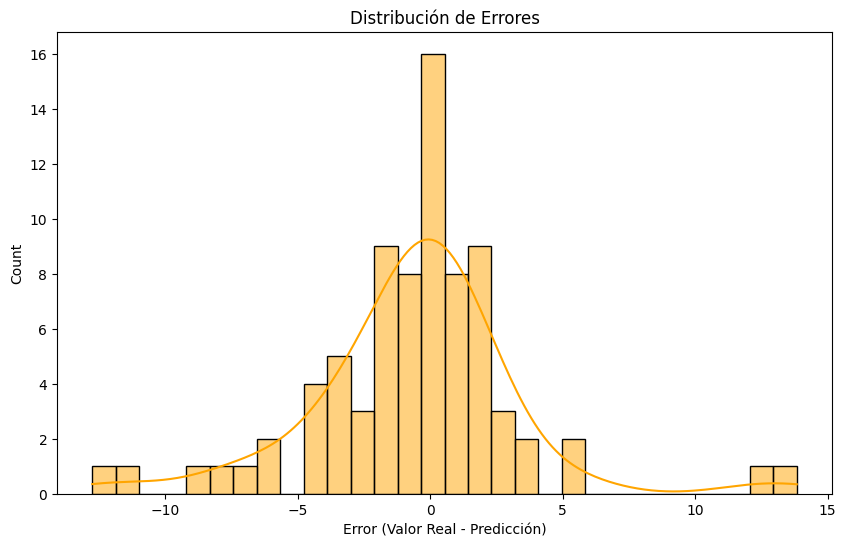

In [35]:
# 2. Histograma de errores
errores = y_test - lasso_predictions
plt.figure(figsize=(10, 6))
sns.histplot(errores, bins=30, kde=True, color="orange")
plt.xlabel("Error (Valor Real - Predicci√≥n)")
plt.title("Distribuci√≥n de Errores")
plt.show()

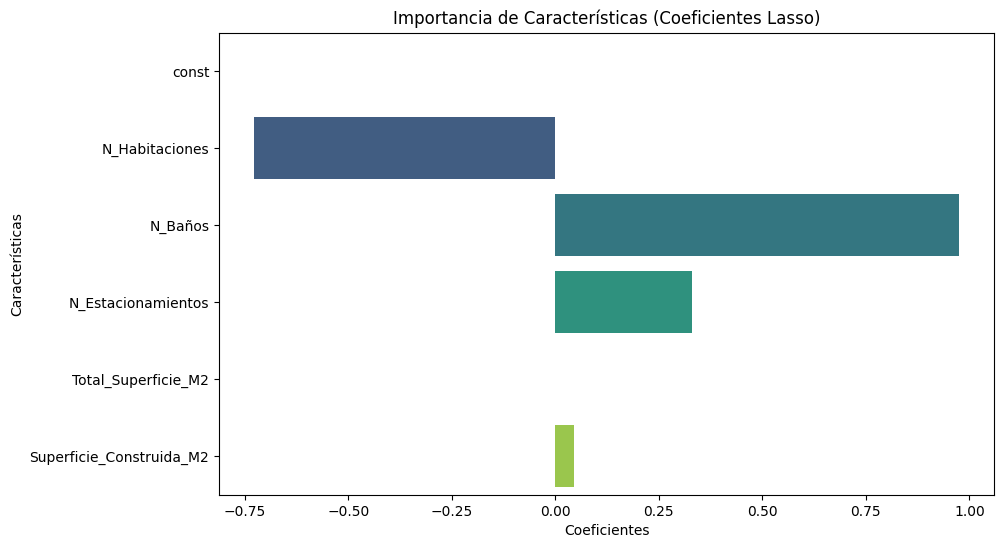

In [36]:
# 3. Gr√°fico de coeficientes del modelo Lasso
coeficientes = pd.DataFrame({"Caracter√≠sticas": X_train.columns, "Coeficientes": lasso_model.coef_})
plt.figure(figsize=(10, 6))
sns.barplot(x="Coeficientes", y="Caracter√≠sticas", data=coeficientes, palette="viridis")
plt.title("Importancia de Caracter√≠sticas (Coeficientes Lasso)")
plt.show()

**VALIDACI√ìN CRUZADA**

Es una t√©cnica para evaluar modelos de aprendizaje autom√°tico (ML) al entrenar m√∫ltiples modelos en subconjuntos de los datos disponibles y evaluarlos con el conjunto de datos complementario. Esta t√©cnica es √∫til para detectar el sobreajuste, que ocurre cuando un modelo no puede generalizar patrones a nuevos datos. La validaci√≥n cruzada ayuda a asegurar que el modelo sea robusto y se desempe√±e bien en datos no vistos, proporcionando una estimaci√≥n m√°s precisa de su rendimiento.

ref https://docs.aws.amazon.com/es_es/machine-learning/latest/dg/cross-validation.html

In [37]:
# Crear el modelo Lasso
lasso_model = Lasso(alpha=0.1)

# Realizar la validaci√≥n cruzada
lasso_cv_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')

# Convertir a positivos ya que `cross_val_score` devuelve valores negativos
lasso_cv_scores = -lasso_cv_scores


In [38]:
# Crear un DataFrame con todas las m√©tricas
resultados = pd.DataFrame({
    "M√©trica": ["MAPE (validaci√≥n cruzada)", "Desviaci√≥n est√°ndar"],
    "Valor": [lasso_cv_scores.mean(), lasso_cv_scores.std()]
})

# Mostrar la tabla de resultados con estilo de color
print("Tabla de m√©tricas del modelo Lasso:")

# Estilizar la tabla con un fondo de gradiente y formato de 2 decimales para los valores
styled_resultados = resultados.style.background_gradient(cmap="coolwarm").format({"Valor": "{:.2f}"})

# Mostrar la tabla estilizada
display(styled_resultados)

Tabla de m√©tricas del modelo Lasso:


# **10. MODELO DE RIDGE REGRESSION**

El modelo de regresi√≥n Ridge es una t√©cnica de an√°lisis de regresi√≥n que se utiliza para abordar problemas de multicolinealidad (cuando las variables predictivas est√°n altamente correlacionadas) y para evitar el sobreajuste del modelo. Se basa en la regresi√≥n lineal, pero a√±ade un t√©rmino de penalizaci√≥n a la funci√≥n de coste, que es la norma L2 del vector de coeficientes.

**Aplicaciones**

La regresi√≥n Ridge es especialmente √∫til en contextos donde hay muchas variables predictivas o donde algunas de ellas son redundantes. Es com√∫n en campos como la econom√≠a, la biolog√≠a y el aprendizaje autom√°tico, donde se manejan grandes conjuntos de datos con interacciones complejas entre las variables.

ref https://interactivechaos.com/es/manual/tutorial-de-machine-learning/regresion-ridge

In [39]:
# Crear el modelo Ridge
ridge_model = Ridge(alpha=0.1)  # Ajusta el valor de alpha seg√∫n sea necesario


In [40]:
# Entrenar el modelo Ridge
ridge_model.fit(X_train, y_train)


Ridge(alpha=0.1)

In [41]:
# Hacer predicciones
ridge_predictions = ridge_model.predict(X_test)


In [42]:
# Calcular m√©tricas para Ridge
ridge_mape = mean_absolute_percentage_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)

In [43]:


# Crear un DataFrame con todas las m√©tricas
resultados = pd.DataFrame({
    "M√©trica": ["MAPE", "RMSE", "R^2", ],
    "Valor": [ridge_mape, ridge_rmse, ridge_r2]
})

# Mostrar la tabla de resultados con estilo de color
print("\nTabla de m√©tricas del modelo Ridge:")
styled_resultados = resultados.style.background_gradient(cmap="coolwarm").format({"Valor": "{:.2f}"})
display(styled_resultados)




Tabla de m√©tricas del modelo Ridge:


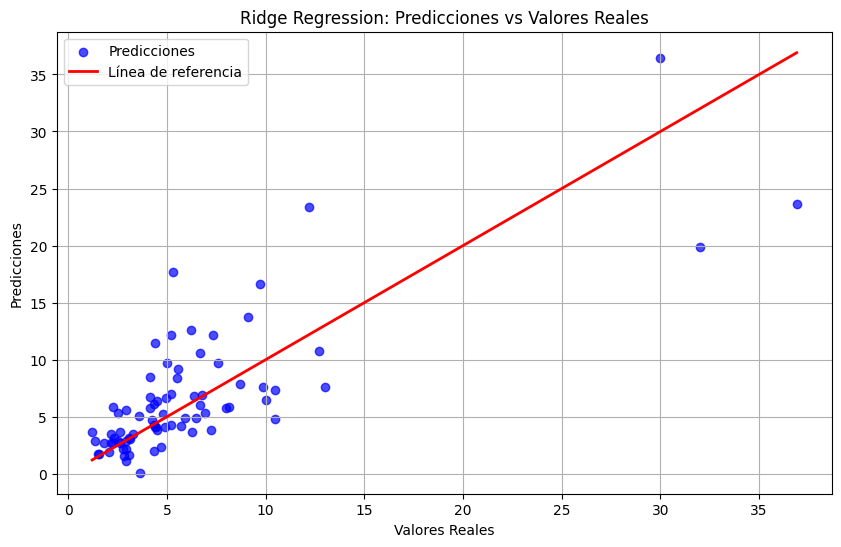

In [44]:
# Gr√°fica de las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_predictions, color='blue', label='Predicciones', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='L√≠nea de referencia')
plt.title('Ridge Regression: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()



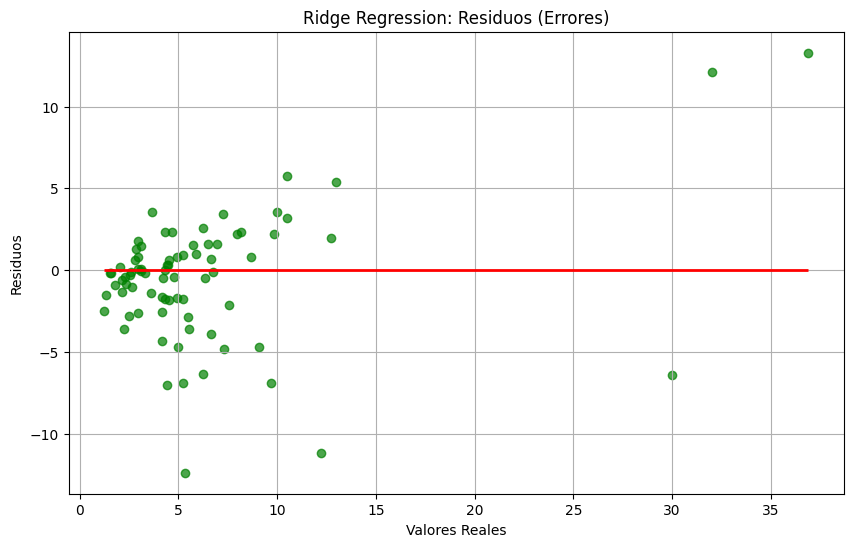

In [45]:
# Gr√°fico de residuos (errores)
residuals = y_test - ridge_predictions

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.7)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linewidth=2)
plt.title('Ridge Regression: Residuos (Errores)')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

In [46]:

# Realizar validaci√≥n cruzada para ver el desempe√±o del modelo
ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores negativos a positivos y calcular el RMSE
ridge_cv_rmse = np.sqrt(-ridge_cv_scores)

# Calcular el promedio de RMSE para mostrarlo en la tabla
mean_ridge_cv_rmse = ridge_cv_rmse.mean()

# Crear un DataFrame con todas las m√©tricas
resultados = pd.DataFrame({
    "M√©trica": ["Validaci√≥n Cruzada MSE (RMSE)", "Promedio de RMSE (CV)"],
    "Valor": [", ".join([f"{x:.2f}" for x in ridge_cv_rmse]), f"{mean_ridge_cv_rmse:.2f}"]
})

# Mostrar la tabla de resultados con estilo de color
print("\nTabla de m√©tricas del modelo Ridge:")
styled_resultados = resultados.style.background_gradient(cmap="coolwarm")
display(styled_resultados)



Tabla de m√©tricas del modelo Ridge:


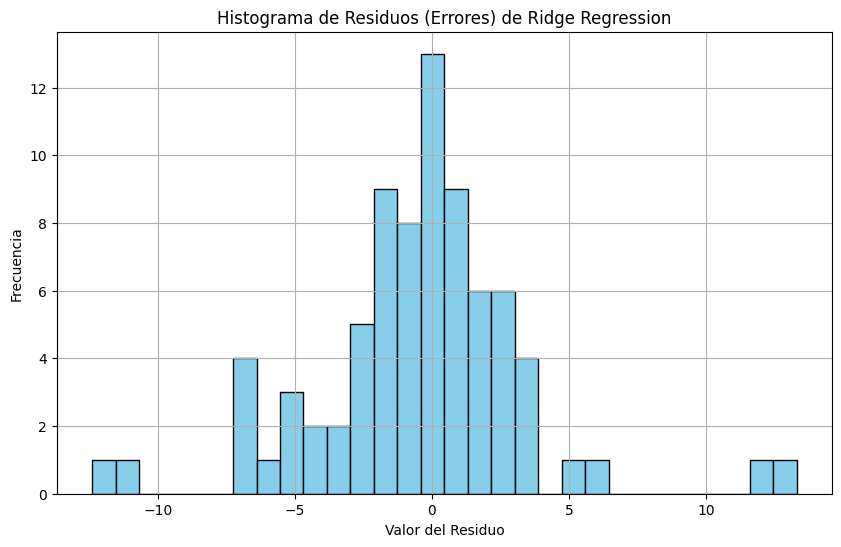

In [47]:
# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')
plt.title('Histograma de Residuos (Errores) de Ridge Regression')
plt.xlabel('Valor del Residuo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# **11. RED NEURONAL PROFUNDA (DNN)**

In [48]:
# Crear DataFrame
df = df_viviendas_clean

In [49]:
# Codificaci√≥n de las variables categ√≥ricas
comuna_tokenizer = tf.keras.preprocessing.text.Tokenizer()
comuna_tokenizer.fit_on_texts(df['Comuna'])
df['Comuna_encoded'] = comuna_tokenizer.texts_to_sequences(df['Comuna'])

tipo_vivienda_tokenizer = tf.keras.preprocessing.text.Tokenizer()
tipo_vivienda_tokenizer.fit_on_texts(df['Tipo_Vivienda'])
df['Tipo_Vivienda_encoded'] = tipo_vivienda_tokenizer.texts_to_sequences(df['Tipo_Vivienda'])

In [50]:
# Rellenar las secuencias para que tengan la misma longitud
max_comuna_len = max(df['Comuna_encoded'].apply(len))  # Longitud m√°xima de las secuencias
max_tipo_vivienda_len = max(df['Tipo_Vivienda_encoded'].apply(len))  # Longitud m√°xima de las secuencias


In [51]:
df['Comuna_encoded'] = pad_sequences(df['Comuna_encoded'], maxlen=max_comuna_len, padding='post')
df['Tipo_Vivienda_encoded'] = pad_sequences(df['Tipo_Vivienda_encoded'], maxlen=max_tipo_vivienda_len, padding='post')


In [52]:
# Codificaci√≥n one-hot para 'Qui√©n_vende' y 'Corredor'
encoder = LabelEncoder()
df['Qui√©n_vende_encoded'] = encoder.fit_transform(df['Qui√©n_Vende'])
df['Corredor_encoded'] = encoder.fit_transform(df['Corredor'])


In [53]:
# Preprocesamiento de las variables num√©ricas
numerical_features = ['N_Habitaciones', 'N_Ba√±os', 'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2']
X = df[numerical_features + ['Comuna_encoded', 'Tipo_Vivienda_encoded', 'Qui√©n_vende_encoded', 'Corredor_encoded']]


In [54]:
# Normalizaci√≥n de los datos
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [55]:
# Variable objetivo
y = df['Valor_UF']


In [56]:
# Eliminar filas con valores faltantes
X = X.dropna()
y = y.dropna()

In [57]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(1, activation='linear'))  # Capa de salida para regresi√≥n


In [59]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


In [60]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 40ms/step - loss: 229.4465 - val_loss: 71.8399
Epoch 2/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - loss: 74.1360 - val_loss: 40.1105
Epoch 3/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 37.0104 - val_loss: 39.4846
Epoch 4/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 38.9987 - val_loss: 33.3899
Epoch 5/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 31.5291 - val_loss: 33.0157
Epoch 6/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 32.4213 - val_loss: 30.5067
Epoch 7/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 36.4105 - val_loss: 31.4079
Epoch 8/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 33.0213 - va

In [61]:
# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f'P√©rdida en el conjunto de prueba: {loss}')


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 26.2159 
P√©rdida en el conjunto de prueba: 25.528547286987305


In [62]:
# Hacer predicciones
predicciones = model.predict(X_test)
print(predicciones)

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step
[[ 2.5500553e+00]
 [-4.5636296e-01]
 [ 4.0351601e+00]
 [ 1.3199662e+01]
 [ 7.8163571e+00]
 [ 1.7127583e+01]
 [ 4.7247343e+00]
 [ 4.4770074e+00]
 [ 6.4929500e+00]
 [ 2.7465024e+00]
 [ 5.5901923e+00]
 [ 1.0110696e+01]
 [ 1.3632386e+01]
 [ 2.1643677e+00]
 [ 1.0587154e+01]
 [ 3.0985594e+00]
 [ 1.9886745e+01]
 [ 1.8679920e+01]
 [ 3.7964134e+00]
 [ 1.8671951e+01]
 [ 7.6875935e+00]
 [ 7.9076443e+00]
 [ 2.5968647e+00]
 [ 7.0600009e-01]
 [ 3.6649652e+00]
 [ 1.1627059e+00]
 [ 1.9756100e+01]
 [ 1.2931371e+00]
 [ 9.6446018e+00]
 [ 1.6389589e+00]
 [ 6.2007136e+00]
 [ 4.0631890e+00]
 [ 5.7662039e+00]
 [ 3.9981375e+00]
 [ 9.6489973e+00]
 [ 4.7763052e+00]
 [ 6.7859855e+00]
 [ 2.6026638e+01]
 [ 1.0553308e+00]
 [ 2.3096747e+00]
 [ 4.7266412e+00]
 [-1.2079716e-02]
 [ 1.5793347e+00]
 [ 2.2506229e+01]
 [ 9.2498903e+00]
 [ 4.1106386e+00]
 [ 4.9220948e+00]
 [ 2.0699086e+00]
 [ 4.4976802e+00]
 [ 4.9746957e+00]
 [ 2.0029063e+00]
 [ 3

In [63]:
# Calcular m√©tricas
mae = mean_absolute_error(y_test, predicciones)
rmse = np.sqrt(mean_squared_error(y_test, predicciones))
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)
mape = mean_absolute_percentage_error(y_test, predicciones)

# Crear datos para la tabla
metricas = {
    "M√©trica": ["MAE", "RMSE", "MSE", "R2", "MAPE"],
    "Valor": [mae, rmse, mse, r2, mape]
}

# Crear DataFrame de m√©tricas
df_metricas = pd.DataFrame(metricas)

# Aplicar estilo de color
styled_df = df_metricas.style.background_gradient(cmap="Blues").format({"Valor": "{:.2f}"})

# Mostrar tabla estilizada
display(styled_df)


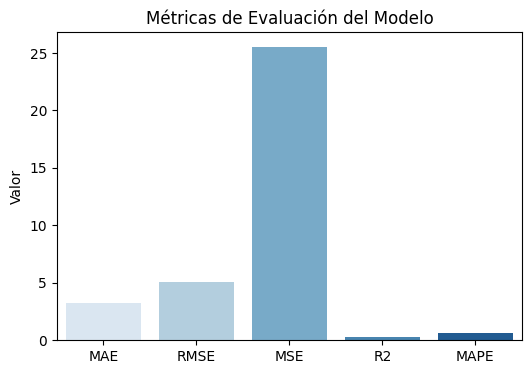

In [64]:
# Crear el gr√°fico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x="M√©trica", y="Valor", data=df_metricas, palette="Blues")

# T√≠tulo y etiquetas
plt.title("M√©tricas de Evaluaci√≥n del Modelo")
plt.xlabel("")
plt.ylabel("Valor")
plt.show()

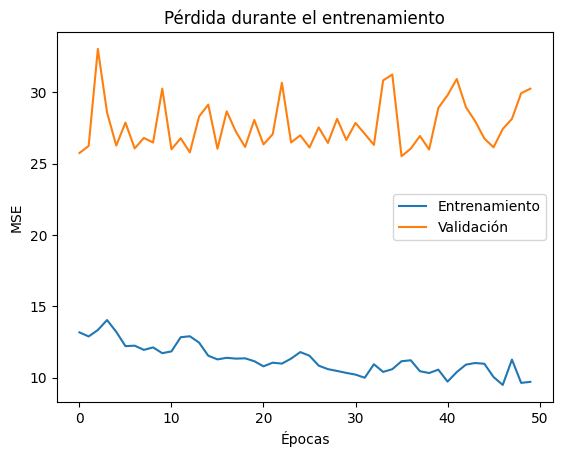

In [65]:
# Gr√°fico de p√©rdida
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validaci√≥n')
plt.title('P√©rdida durante el entrenamiento')
plt.xlabel('√âpocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

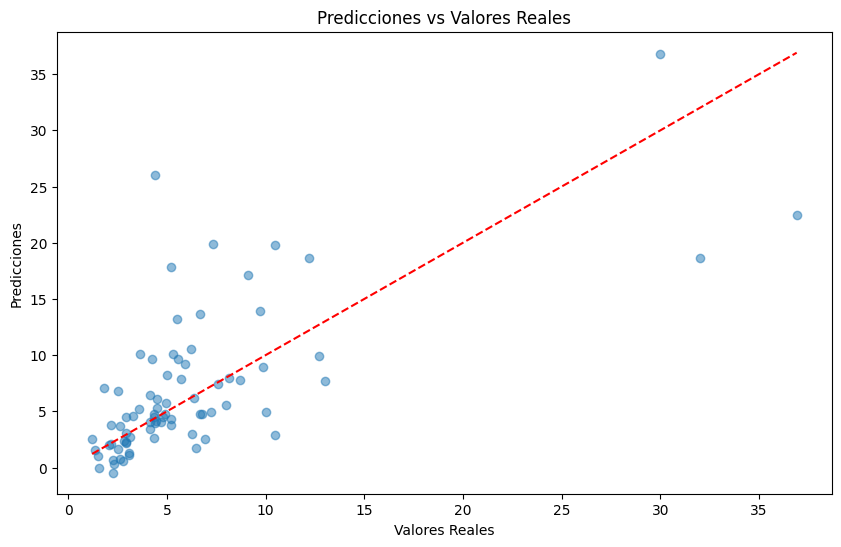

In [66]:
# Gr√°fico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

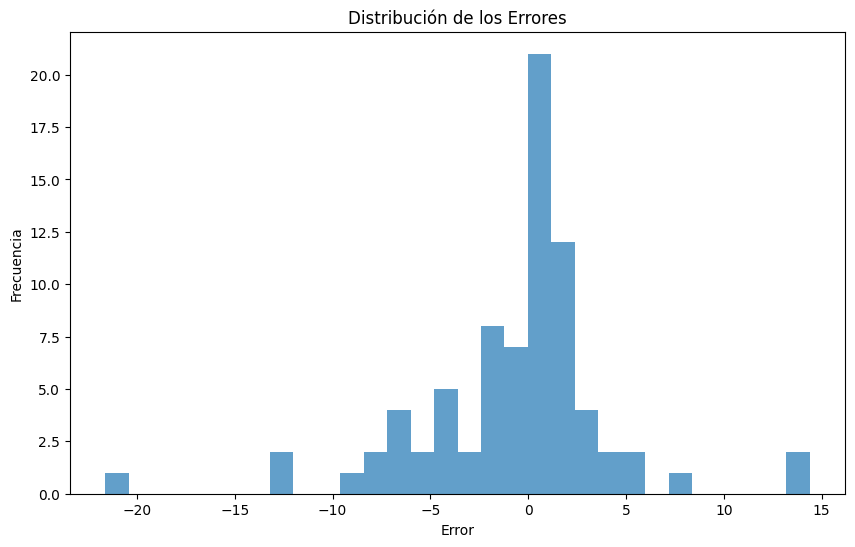

In [67]:
# Histograma de errores
errores = y_test - predicciones.flatten()
plt.figure(figsize=(10, 6))
plt.hist(errores, bins=30, alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de los Errores')
plt.show()

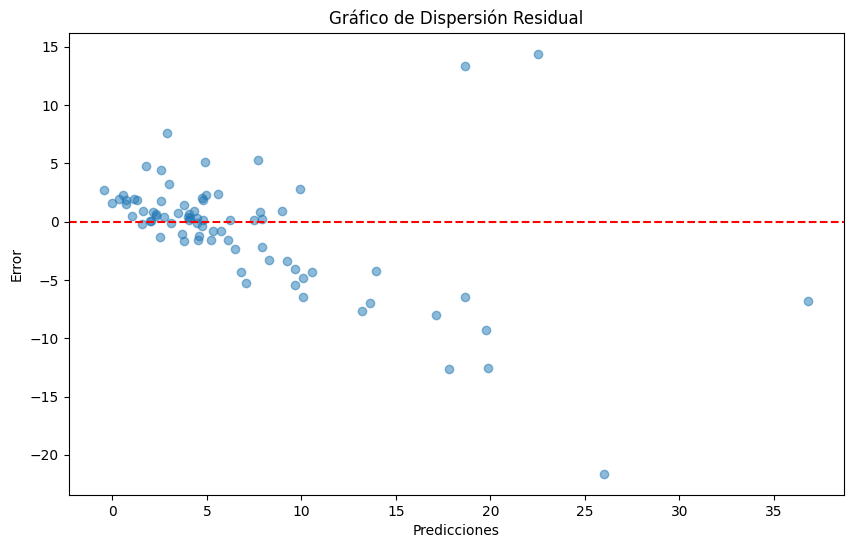

In [68]:
# Gr√°fico de dispersi√≥n residual
plt.figure(figsize=(10, 6))
plt.scatter(predicciones, errores, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Error')
plt.title('Gr√°fico de Dispersi√≥n Residual')
plt.show()

# **12. RESULTADOS Y M√âTRICAS**

**1. Modelo de Regresi√≥n Lineal M√∫ltiple (OLS):**


*   **R^2 = 0.58:**  Esto indica que el modelo explica aproximadamente el 58% de la variabilidad en los precios de las viviendas, lo que sugiere que hay margen para mejorar.
*   **MSE y RMSE:** Un MSE de 15.21 y un RMSE de 3.90 son valores que, aunque dan una idea de la precisi√≥n del modelo, muestran que todav√≠a hay errores en las predicciones. Un RMSE m√°s bajo es preferible, as√≠ que la mejora del modelo ser√≠a beneficiosa.

**2. Modelo de Lasso Regression:**

*   **MAPE (0.46%) y RMSE (3.93):**  Estos resultados son bastante prometedores, indicando que el modelo Lasso proporciona predicciones m√°s precisas que el modelo OLS, a pesar de que el RMSE es similar.
*   **MSE y RMSE:** Un MAPE de 0.43% en validaci√≥n cruzada con una desviaci√≥n est√°ndar de 0.10 sugiere que el modelo Lasso tiene una buena capacidad de generalizaci√≥n y es robusto ante datos nuevos.

**2. Modelo de Lasso Regression:**

*   **MAPE (0.46%) y RMSE (3.93):**  Estos resultados son bastante prometedores, indicando que el modelo Lasso proporciona predicciones m√°s precisas que el modelo OLS, a pesar de que el RMSE es similar.
*   **MSE y RMSE:** Un MAPE de 0.43% en validaci√≥n cruzada con una desviaci√≥n est√°ndar de 0.10 sugiere que el modelo Lasso tiene una buena capacidad de generalizaci√≥n y es robusto ante datos nuevos.

**3. Modelo de Ridge Regression:**

*   Los resultados son similares a los del modelo Lasso, con un MAPE de 0.46% y RMSE de 3.90. Esto indica que el modelo Ridge tambi√©n es efectivo, pero no mejora significativamente el rendimiento respecto al Lasso..



# **13. CONCLUSIONES**

Bas√°ndose en el rendimiento, el **modelo de Lasso** es el m√°s adecuado
para el proyecto, dado su bajo **MAPE** y su buena capacidad de validaci√≥n cruzada. Esto sugiere que tiene una mejor capacidad para manejar el sobreajuste, lo que es crucial en modelos de regresi√≥n con m√∫ltiples variables.